In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# read in the exported particles file including all clusters
export_particles = pd.read_csv("/Users/feizhao/Coding/QC/data/qc_test.csv", sep = ',', header = 0)
loc_xyz_df = export_particles[['x', 'y', 'z', 'cycle', 'cluster-ID']]
loc_xyz_df = loc_xyz_df.sort_values(by=['cluster-ID', 'cycle'])

print(loc_xyz_df)

             x        y         z  cycle  cluster-ID
3735   24130.3  22900.2  1548.630      0           1
3860   24086.2  22936.3  1629.790      0           1
3861   23871.2  22946.6  1501.160      0           1
3862   24016.6  22940.2  1588.510      0           1
3863   24087.6  22947.5  1591.360      0           1
...        ...      ...       ...    ...         ...
18772  25619.8  25268.7   547.724     38           5
18773  25657.7  25281.7   512.011     38           5
18774  25624.1  25254.9   586.122     38           5
18899  25625.0  25280.7   543.331     39           5
18900  25585.1  25302.4   396.255     39           5

[18940 rows x 5 columns]


In [33]:
clusters_cycles_locs = [[] for _ in range((loc_xyz_df['cluster-ID'].max()+1))]

for i in range(1, (loc_xyz_df['cluster-ID'].max()+1)):
    print(i)
    cluster_df = loc_xyz_df.loc[loc_xyz_df['cluster-ID']==i]
    for j in range(5, (loc_xyz_df['cycle'].max()+5), 5):
        print(j)
        num_locs = len(cluster_df.loc[cluster_df['cycle']<=j])
        clusters_cycles_locs[i].append(num_locs)
clusters_cycles_locs_df = pd.DataFrame(clusters_cycles_locs)
clusters_cycles_locs_df.to_csv('/Users/feizhao/Coding/QC/data/particles_cycles.csv', index = False)


1
5
10
15
20
25
30
35
40
2
5
10
15
20
25
30
35
40
3
5
10
15
20
25
30
35
40
4
5
10
15
20
25
30
35
40
5
5
10
15
20
25
30
35
40


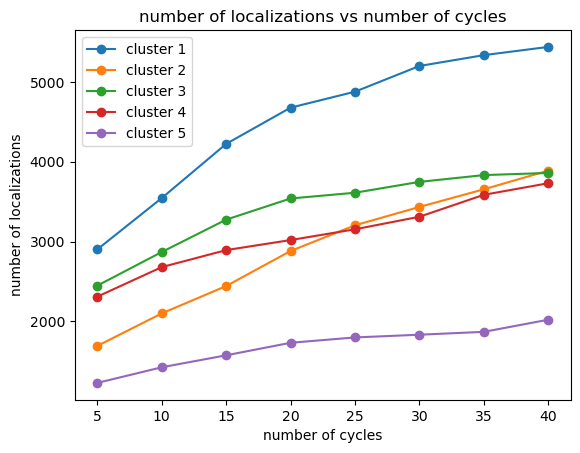

In [34]:
# Plot each row on the same graph
num_cycles=list(range(5, (loc_xyz_df['cycle'].max()+5), 5))
for i in range(1, 6):
    plt.plot(num_cycles, clusters_cycles_locs_df.loc[i, :], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('number of cycles')
plt.ylabel('number of localizations')
plt.title('number of localizations vs number of cycles')

# Add a legend
plt.legend(['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])

# Show the plot
plt.show()